<a href="https://colab.research.google.com/github/rohailkhan/Keras-Deeplearning-Francos/blob/master/Image_classification_part_1_142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os ,shutil
from tensorflow import keras

In [0]:
base_dir='/content/drive/My Drive/cats_and_dogs_small'

In [0]:
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [0]:
#Now inside above 3, make cats and dogs directory in each one of them
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [0]:
#check the number
print('training cats=', len(os.listdir(train_cats_dir)))
print('training dogs=', len(os.listdir(train_dogs_dir)))
print('test cats=', len(os.listdir(test_cats_dir)))
print('test dogs=', len(os.listdir(test_dogs_dir)))

training cats= 1019
training dogs= 1009
test cats= 500
test dogs= 500


In [0]:
print('validation cats=', len(os.listdir(validation_cats_dir)))
print('validation dogs=', len(os.listdir(validation_dogs_dir)))

validation cats= 500
validation dogs= 500


# Check image size ,RGB channels and bands etc

In [0]:
from PIL import Image

m1='/content/drive/My Drive/Aging model/fgsmallbw/001A43a.JPG'
m2='/content/drive/My Drive/Aging model/fgsmallbw/001A18.JPG'
c1='/content/drive/My Drive/cats_vsmall/validation/cats/cat.1000.jpg'

im = Image.open(c1)
print('shape= ' + str(im.size), 'bands of RGB or L= ' + str(im.getbands))
len(im.getbands())

shape= (150, 149) bands of RGB or L= <bound method Image.getbands of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x149 at 0x7FD05A5F2D68>>


3

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3))) # RGB images (150,149) shapes 3 dimensions
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Note: For more than 2 classes,use  categorical_crossentropy. and also change the activation on the last layer to softmax

In [0]:
from tensorflow.keras import optimizers

In [0]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

## Data preprocessing
#### As you know by now, data should be formatted into appropriately preprocessed floatingpoint
#### tensors before being fed into the network. Currently, the data sits on a drive as
#### JPEG files, so the steps for getting it into the network are roughly as follows:
##### 1 Read the picture files.
##### 2 Decode the JPEG content to RGB grids of pixels.
##### 3 Convert these into floating-point tensors.
##### 4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
##### neural networks prefer to deal with small input values).

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
# change TRAIN DATA size to 150 x 150
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),
batch_size=20,class_mode='binary')#Because you use binary_crossentropy loss, you  #need binary labels.

Found 2028 images belonging to 2 classes.


In [0]:
# change TEST DATA size to 150 x 150
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


you need to use tf.compat.v1.Session() as tf.session is deprecated.
In place of tf.contrib.cluster_resolver please use tf.distribute.cluster_resolver

In [0]:
import os
import pprint
import tensorflow as tf

In [0]:
history_small = model.fit_generator(
train_generator,
steps_per_epoch=3,
epochs=2,
validation_data=validation_generator,validation_steps=4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
3/3 [==============================] - 65s 22s/step - loss: 0.7375 - acc: 0.5500 - val_loss: 0.6938 - val_acc: 0.4875
Epoch 2/2
3/3 [==============================] - 56s 19s/step - loss: 0.7088 - acc: 0.5000 - val_loss: 0.6920 - val_acc: 0.6000


# Saving history in JSON format in google drive 

In [0]:
import json
# Get the dictionary containing each metric and the loss for each epoch
#history_small_dict = history_small.history
# Save it under the form of a json file
# json.dump(history_small_dict, open('/content/drive/My Drive/assets/history_small_dict.json', 'w'))

In [0]:
hi = json.load(open('/content/drive/My Drive/assets/history_small_dict.json', 'r'))

In [0]:
hi.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,validation_steps=50)

# Saving model using mode.save
## saving History dictionary using JSON

In [0]:
# make a new directory for saving model
!mkdir -p '/content/drive/My Drive/my_saved_models'

In [0]:
# save the model in the new direcotry
model.save('/content/drive/My Drive//my_saved_models/my_models')

INFO:tensorflow:Assets written to: /content/drive/My Drive//my_saved_models/my_models/assets


In [0]:
# load this save model freshly
# to load the model use the direcotry where the model is present
import tensorflow as tf
new_model=tf.keras.models.load_model('/content/drive/My Drive/my_saved_models')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
# Get the dictionary containing each metric and the loss for each epoch
history1_dict = history.history
# Save it under the form of a json file
json.dump(history1_dict, open('/content/drive/My Drive/assets/history1_dict.json', 'w'))


In [0]:
import json
# Save it under the form of a json file
newpath='/content/drive/My Drive/saved_models/history1_dict.json'
# json.dump(history1_dict, open(newpath, 'w'))

hi = json.load(open(newpath, 'r'))

hi.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

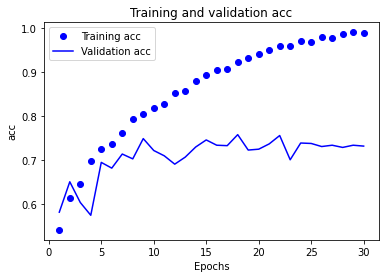

In [0]:
import matplotlib.pyplot as plt
acc = hi['acc']
val_acc = hi['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

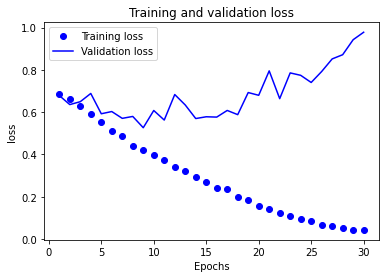

In [0]:
loss = hi['loss']
val_loss = hi['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
#data augmentation
datagen=ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

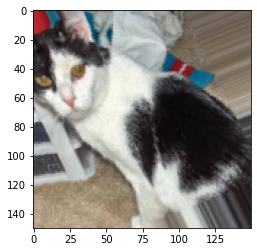

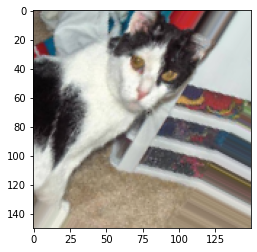

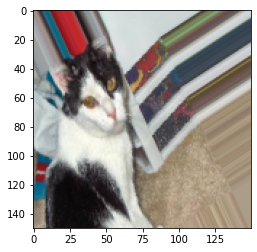

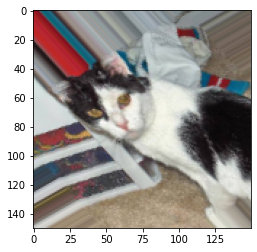

In [0]:
import matplotlib.pyplot as plt
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
from tensorflow.keras import models ,layers ,optimizers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

##  Training the convnet using data-augmentation generators

In [0]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [0]:
# Note : Validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

## Train generator with Target Directory and where we resize all images to 150 x 150

In [0]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 2028 images belonging to 2 classes.


## Validation generator with Target Directory and where we resize all images to 150 x 150

In [0]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
history2 = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

In [0]:
# make a new directory for saving model
!mkdir -p '/content/drive/My Drive/my_saved_aug_models'
# save the model in the new direcotry
model.save('/content/drive/My Drive//my_saved_aug_models/my_aug_model.h5')


In [0]:
# load this save model freshly
# to load the model use the direcotry where the model is present
import tensorflow as tf
new_aug_model=tf.keras.models.load_model('/content/drive/My Drive/my_saved_aug_models/my_aug_model.h5')
new_aug_model.summary()

In [0]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history2_augment_dict = history2.history
# Save it under the form of a json file
json.dump(history2_augment_dict, open('/content/drive/My Drive/my_saved_aug_models/history2_augment_dict.json', 'w'))


In [0]:
newpath='/content/drive/My Drive/my_saved_aug_models/history2_augment_dict.json'
# json.dump(history1_dict, open(newpath, 'w'))

hi = json.load(open(newpath, 'r'))

hi.keys()

NameError: ignored

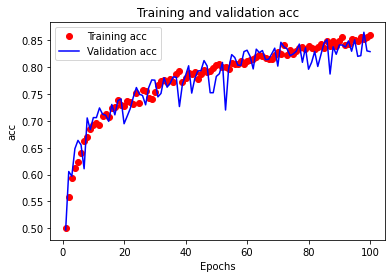

In [0]:
import matplotlib.pyplot as plt
acc = hi['acc']
val_acc = hi['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo',color='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

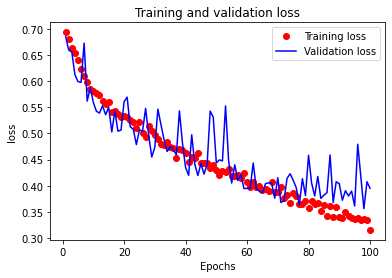

In [0]:
loss = hi['loss']
val_loss = hi['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo',color='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()